In [1]:
import pandas as pd
infile='/Users/irffanalahi/Research/Research_update/Dataqc/Abul_technical_exp_EM-seq/EM-Seq_cfDNA_technical_expt_bg_rolled_all_matrixCin'
randomrows=10000
indf=pd.read_csv(infile,sep='\t')
indf.head()

,position,EM-Seq_10-cfDNA.bedgraph_rolled,EM-Seq_30-cfDNA.bedgraph_rolled,EM-Seq_3-cfDNA.bedgraph_rolled
0,chr1:17378,1.0,NaN,0.5
1,chr1:17406,1.0,NaN,1.0
2,chr1:17452,1.0,NaN,1.0
3,chr1:17478,1.0,NaN,1.0
4,chr1:17483,1.0,NaN,1.0


In [2]:
indf = indf.dropna()
indf.head()

,position,EM-Seq_10-cfDNA.bedgraph_rolled,EM-Seq_30-cfDNA.bedgraph_rolled,EM-Seq_3-cfDNA.bedgraph_rolled
6,chr1:17562,1.00,0.500,0.00
26,chr1:54649,0.33,1.000,0.50
28,chr1:64563,0.50,0.000,0.67
30,chr1:74902,0.75,0.800,1.00
31,chr1:74953,1.00,0.835,1.00


In [3]:
randomdf=(indf.sample(n = randomrows,random_state=0)).copy()
randomdf.head()

,position,EM-Seq_10-cfDNA.bedgraph_rolled,EM-Seq_30-cfDNA.bedgraph_rolled,EM-Seq_3-cfDNA.bedgraph_rolled
24940698,chr9:70386095,0.860,0.912,1.000
22837594,chr7:104940359,0.861,0.864,1.000
3519166,chr11:1336762,0.000,0.000,0.000
17417547,chr3:185426179,1.000,0.875,0.939
20150183,chr5:156294387,1.000,0.921,0.964


In [4]:
randomdf.shape

(10000, 4)

In [5]:
randomdf.set_index('position',inplace=True)
randomdf.head()

,EM-Seq_10-cfDNA.bedgraph_rolled,EM-Seq_30-cfDNA.bedgraph_rolled,EM-Seq_3-cfDNA.bedgraph_rolled
position,,,
chr9:70386095,0.860,0.912,1.000
chr7:104940359,0.861,0.864,1.000
chr11:1336762,0.000,0.000,0.000
chr3:185426179,1.000,0.875,0.939
chr5:156294387,1.000,0.921,0.964


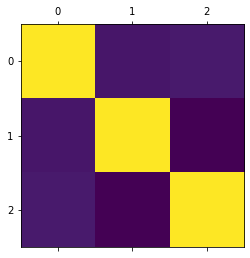

In [6]:
import matplotlib.pyplot as plt

plt.matshow(randomdf.corr())
plt.show()

In [7]:
randomdf.corr('pearson')

,EM-Seq_10-cfDNA.bedgraph_rolled,EM-Seq_30-cfDNA.bedgraph_rolled,EM-Seq_3-cfDNA.bedgraph_rolled
EM-Seq_10-cfDNA.bedgraph_rolled,1.000000,0.924148,0.924964
EM-Seq_30-cfDNA.bedgraph_rolled,0.924148,1.000000,0.919187
EM-Seq_3-cfDNA.bedgraph_rolled,0.924964,0.919187,1.000000


In [8]:
randomdf.corr('spearman')

,EM-Seq_10-cfDNA.bedgraph_rolled,EM-Seq_30-cfDNA.bedgraph_rolled,EM-Seq_3-cfDNA.bedgraph_rolled
EM-Seq_10-cfDNA.bedgraph_rolled,1.000000,0.661100,0.671002
EM-Seq_30-cfDNA.bedgraph_rolled,0.661100,1.000000,0.644252
EM-Seq_3-cfDNA.bedgraph_rolled,0.671002,0.644252,1.000000


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


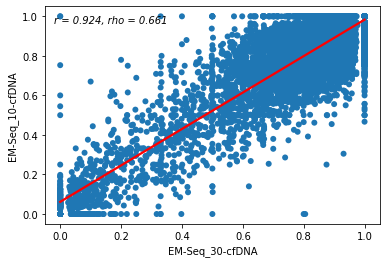

In [9]:
###pearson spearman plot###
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
from scipy.stats import pearsonr
from scipy.stats import spearmanr

x='EM-Seq_30-cfDNA.bedgraph_rolled'
y='EM-Seq_10-cfDNA.bedgraph_rolled'

corr = pearsonr(randomdf[x], randomdf[y])

corr_spear=spearmanr(randomdf[x], randomdf[y])

text='r = %s, rho = %s' % (format(corr[0], '.3f'),  format(corr_spear[0], ".3f")  )

g=sns.scatterplot(randomdf[x], randomdf[y],edgecolor='none')
ax=sns.regplot(randomdf[x], randomdf[y],scatter=False,color='red',ci = None)
anc = AnchoredText(text, loc="upper left", frameon=False,prop=dict(fontstyle="italic"))
plt.xlabel(x.replace('.bedgraph_rolled',''))
# Set y-axis label
plt.ylabel(y.replace('.bedgraph_rolled',''))
ax.add_artist(anc)
savename=infile+"_"+x+"_"+y+".pdf"
plt.savefig(savename,dpi=300,bbox_inches="tight")

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


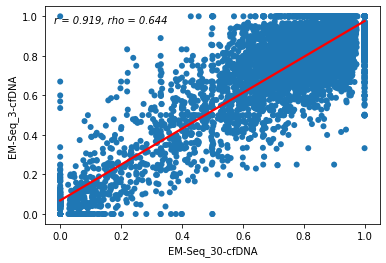

In [10]:
x='EM-Seq_30-cfDNA.bedgraph_rolled'
y='EM-Seq_3-cfDNA.bedgraph_rolled'

corr = pearsonr(randomdf[x], randomdf[y])

corr_spear=spearmanr(randomdf[x], randomdf[y])

text='r = %s, rho = %s' % (format(corr[0], '.3f'),  format(corr_spear[0], ".3f")  )

g=sns.scatterplot(randomdf[x], randomdf[y],edgecolor='none')
ax=sns.regplot(randomdf[x], randomdf[y],scatter=False,color='red',ci = None)
anc = AnchoredText(text, loc="upper left", frameon=False,prop=dict(fontstyle="italic"))
plt.xlabel(x.replace('.bedgraph_rolled',''))
# Set y-axis label
plt.ylabel(y.replace('.bedgraph_rolled',''))
ax.add_artist(anc)
savename=infile+"_"+x+"_"+y+".pdf"
plt.savefig(savename,dpi=300,bbox_inches="tight")

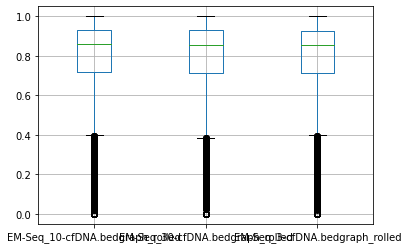

In [11]:
####hypo hyper standard deviation

randomdf.boxplot() 